# Введение

В этом проекте я хочу проанализировать твиты Илона Маска. 

К сожалению, с недавних пор Twitter API платное, а скреппинг данных Twitter запрещен пправилами компании.

Поэтому мне прийдется найти готовый датасет, который бы удовлетворял моим критериям. Буду искать данные на Kaggle.

In [1]:
# сразу подключим все, что в будущем нам понадобится
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# установка глобальной цветовой палитры
sns.set_palette('Accent')

In [2]:
# *скачиваем файл с АПИ ключем с сайта Кеггля*
import shutil

# перемещаем файл в нужную директорию
shutil.move('/content/kaggle.json', '/root/.kaggle/kaggle.json')

# устанавливаем нужное разрешение для файла ключа
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# посмотрим, какие есть датасеты с твитами илона, акутальные на 23 год
!kaggle datasets list -s 'elon-musk-tweets-2023'

ref                                                   title                                   size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------  --------------------------------------  ----  -------------------  -------------  ---------  ---------------  
muhammadavici/latest-elon-musk-tweets-from-2010-2023  Latest Elon Musk Tweets From 2010-2023   1MB  2023-03-06 10:04:44             20          2  0.3529412        


In [4]:
# по данным ключевым словам датасет единственный, скачаем его и посмотрим, что он из себя представляет
!kaggle datasets download -d 'muhammadavici/latest-elon-musk-tweets-from-2010-2023' -p /content

 73% 1.00M/1.36M [00:00<00:00, 1.98MB/s]
100% 1.36M/1.36M [00:00<00:00, 2.53MB/s]


In [5]:
# извлекаем датасет из архива
import zipfile

with zipfile.ZipFile('/content/latest-elon-musk-tweets-from-2010-2023.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/latest-elon-musk-tweets-from-2010-2023')

In [6]:
df = pd.read_csv('/content/latest-elon-musk-tweets-from-2010-2023/Elon_tweets_2010_2023.csv')

In [7]:
df

,id,url,time_stamp_UTC,tweet_content,retweet_count,like_count,quote_count,view_count
0,1632525389863034882,https://twitter.com/elonmusk/status/1632525389...,2023-03-05 23:35:58,@kimbal It is inspiring to think that humans d...,2099,45510,155,2203592.0
1,1632525209503928322,https://twitter.com/elonmusk/status/1632525209...,2023-03-05 23:35:15,@chicago_glenn The meme community has high sta...,285,4879,21,114591.0
2,1632524972588695553,https://twitter.com/elonmusk/status/1632524972...,2023-03-05 23:34:18,@ThePrimeagen As an attachment? How many chars...,318,5350,154,2024375.0
3,1632524437227716608,https://twitter.com/elonmusk/status/1632524437...,2023-03-05 23:32:11,Add Fun to the FDA &amp; rename to FFDA,2055,12735,249,9198331.0
4,1632523912893575168,https://twitter.com/elonmusk/status/1632523912...,2023-03-05 23:30:06,@BillyM2k @POTUS What about fun? I say vote fo...,355,5242,44,170313.0
...,...,...,...,...,...,...,...,...
20722,142881284019060736,https://twitter.com/elonmusk/status/1428812840...,2011-12-03 08:22:07,That was a total non sequitur btw,14,143,8,NaN
20723,142880871391838208,https://twitter.com/elonmusk/status/1428808713...,2011-12-03 08:20:28,"Great Voltaire quote, arguably better than Twa...",31,85,6,NaN
20724,142188458125963264,https://twitter.com/elonmusk/status/1421884581...,2011-12-01 10:29:04,I made the volume on the Model S http://t.co/w...,10,79,8,NaN
20725,142179928203460608,https://twitter.com/elonmusk/status/1421799282...,2011-12-01 09:55:11,Went to Iceland on Sat to ride bumper cars on ...,24,196,7,NaN


Я рассчитывала найти датасет, где есть хотя бы текст твита, дата, количество лайков и ретвитов. Так что этот датасет мне подходит.

Однако тут есть пара лишних колонок, а также не все имена колонок мне нравятся.

In [8]:
# выкинем лишние столбцы
df = df.drop(['id', 'url'], axis=1)
# переименуем колонки
df.columns = ['date', 'text', 'retweet_count', 'like_count', 'quote_count', 'view_count']

df

,date,text,retweet_count,like_count,quote_count,view_count
0,2023-03-05 23:35:58,@kimbal It is inspiring to think that humans d...,2099,45510,155,2203592.0
1,2023-03-05 23:35:15,@chicago_glenn The meme community has high sta...,285,4879,21,114591.0
2,2023-03-05 23:34:18,@ThePrimeagen As an attachment? How many chars...,318,5350,154,2024375.0
3,2023-03-05 23:32:11,Add Fun to the FDA &amp; rename to FFDA,2055,12735,249,9198331.0
4,2023-03-05 23:30:06,@BillyM2k @POTUS What about fun? I say vote fo...,355,5242,44,170313.0
...,...,...,...,...,...,...
20722,2011-12-03 08:22:07,That was a total non sequitur btw,14,143,8,NaN
20723,2011-12-03 08:20:28,"Great Voltaire quote, arguably better than Twa...",31,85,6,NaN
20724,2011-12-01 10:29:04,I made the volume on the Model S http://t.co/w...,10,79,8,NaN
20725,2011-12-01 09:55:11,Went to Iceland on Sat to ride bumper cars on ...,24,196,7,NaN


# Первичное изучение данных, заполнение пропусков

Изучим датасет.

Во-первых, видим, что твиты собраны с 4 июня 2010 по 5 марта 2023.

Во-вторых, понятно, что из столбца text еще можно будет повытягивать данные: сырой текст (без эмодзи, ссылок и @) и собственно эмодзи, ссылки и упоминания других людей.

В-третьих, нужно проверить данные на пропуски.

В-четвертых, хорошо бы глянуть на взаимосвязи в численных столбцах.  С этого и начнем.

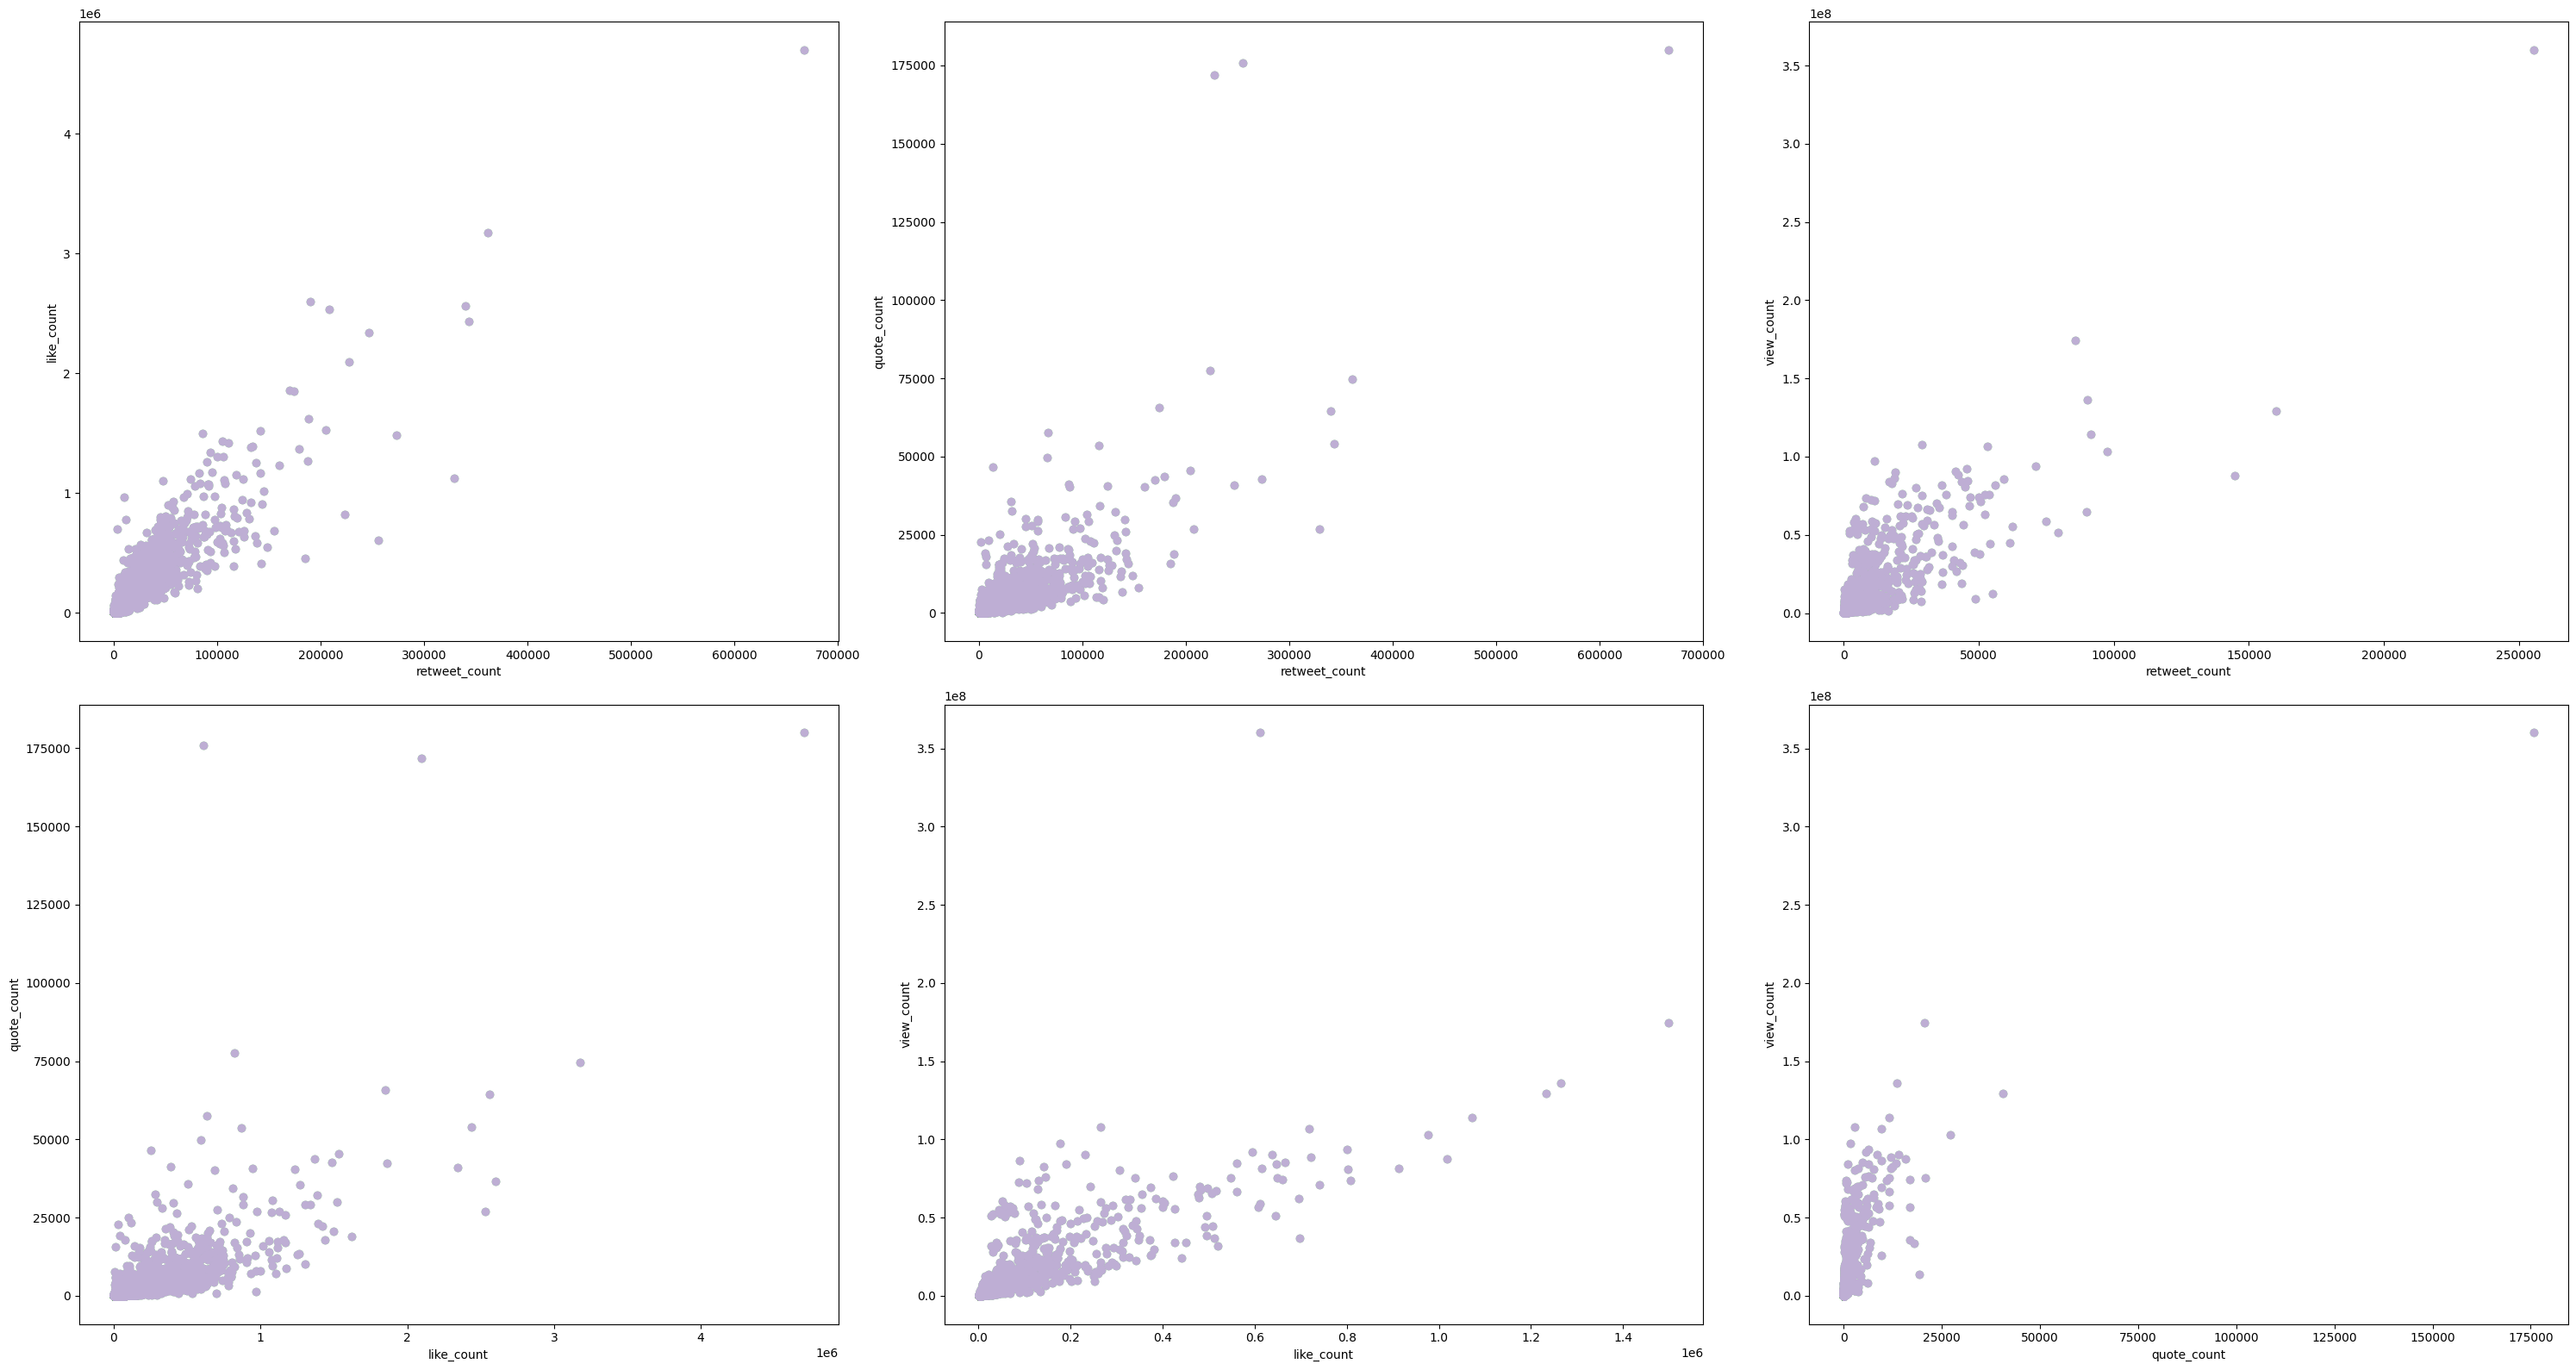

In [9]:
from itertools import combinations

columns = ['retweet_count', 'like_count', 'quote_count', 'view_count']
colname_pairs = list(combinations(columns, 2))
width = 10
height = 8

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(width*num_cols, height*num_rows))
for i, (x, y) in enumerate(colname_pairs):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axes[row_idx, col_idx].scatter(df[x], df[y])
    axes[row_idx, col_idx].scatter(df[x], df[y])
    axes[row_idx, col_idx].set_xlabel(x)
    axes[row_idx, col_idx].set_ylabel(y)

plt.tight_layout()
plt.show()


Как я и думала, количество лайков, ретвитов, просмотров и цитирований попарно положительно скоррелированы. 

Заметим, что на графиках с view_count точек меньше, чем на остальных. Время проверить данные на пропуски.

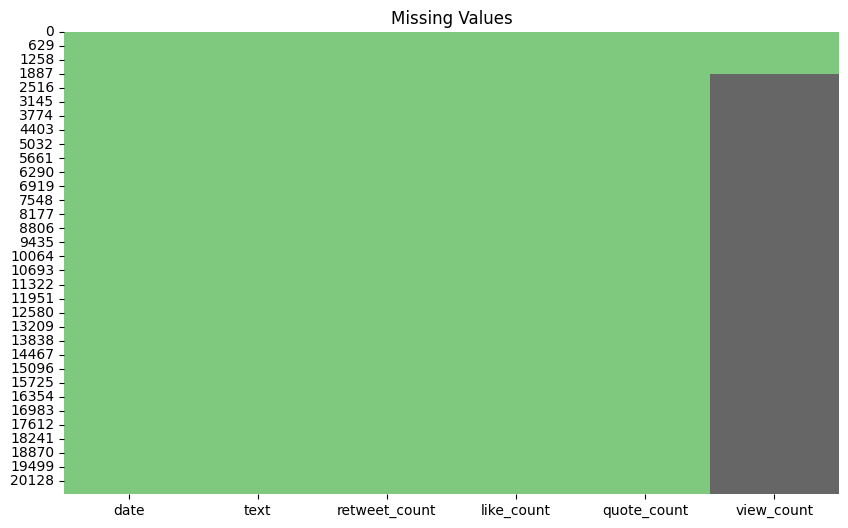

In [10]:
# создаем матрицу с булевыми значениями, где 1 - пропущенное значение
missing_values = df.isnull()

# строим хитмап для визуализации пропущенных значений
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cbar=False, cmap='Accent')
plt.title('Missing Values')
plt.show()


Видим, что в колонке view_counts пропущено около 90% значений. Это связано с тем, что возможность смотреть просмотры твитов была введена всего пару лет назад. 

Есть вариант просто выкинуть данную колонку, но я хочу сделать по-другому. Как видно из графиков, которые были построены на предыдущем шаге, есть линейная связь между количеством просмотров и значениями в других колонках. Попробуем предсказать прорпущенные значения в последней колонке, исходя из значений в других колонках.

In [11]:
from sklearn.linear_model import LinearRegression

features = ['retweet_count', 'like_count', 'quote_count']  # колонки с полными данными
target = 'view_count'  # целевая колонка

# разделение данных на две части: с полными значениями и с пустыми значениями
df_with_values = df.dropna(subset=features + [target])
df_to_fill = df[df[target].isnull()]

# создание и обучение модельки
model = LinearRegression()
model.fit(df_with_values[features], df_with_values[target])

# предсказание значений для пустых ячеек
predicted_values = model.predict(df_to_fill[features])

# заполнение пустых значений в исходном датасете
df.loc[df[target].isnull(), target] = predicted_values


# Анализ датафрейма

## Активность Илона Маска

Поанализируем датафрейм. Начнем с активности Илона в зависимости от времени.

Посмотрим на следующие распределения:

1.   Общий тренд (как изменялась активность с 2010 по 2023 года)
2.   Активность по месяцам
3. Актиность по дням недели
4. Активность по часам



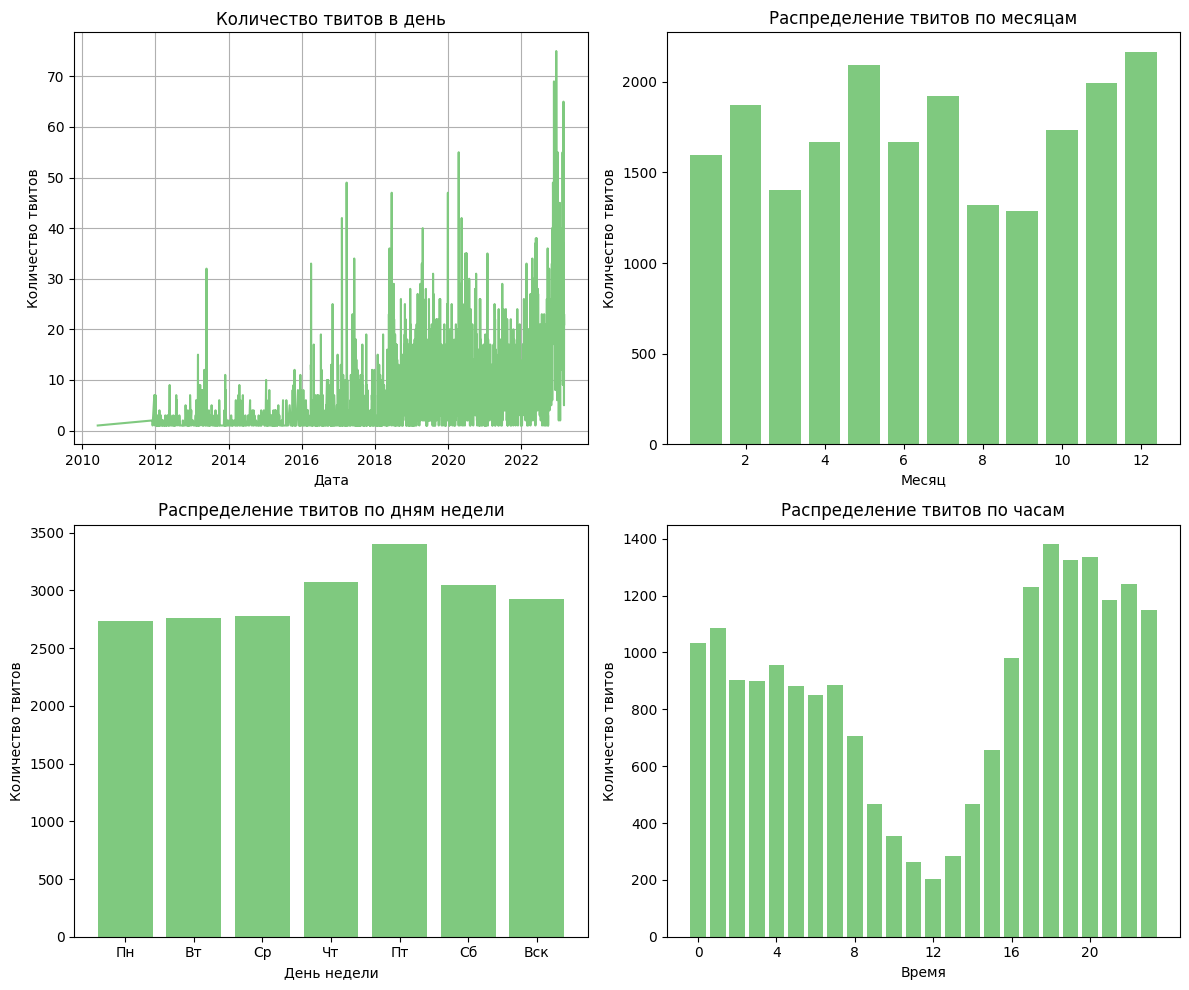

In [12]:
# преобразуем столбец с датами в формат datetime
df['date'] = pd.to_datetime(df['date'])

# Распределение по дням, месяцам, дням недели, часе
daily_counts = df.groupby(df['date'].dt.date).size()

monthly_distribution = df.groupby(df['date'].dt.month).size()

daily_distribution = df['date'].dt.dayofweek.value_counts().sort_index()
days_of_week = {0: 'Пн', 1: 'Вт', 2: 'Ср', 3: 'Чт', 4: 'Пт', 5: 'Сб', 6: 'Вск'}
daily_distribution.index = daily_distribution.index.map(days_of_week)

hourly_distribution = df['date'].dt.hour.value_counts().sort_index()

# Визуализация распределения твитов по времени
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Количество твитов в день
axes[0, 0].plot(daily_counts.index, daily_counts.values)
axes[0, 0].set_xlabel('Дата')
axes[0, 0].set_ylabel('Количество твитов')
axes[0, 0].set_title('Количество твитов в день')
axes[0, 0].grid(True)

# Распределение твитов по месяцам
axes[0, 1].bar(monthly_distribution.index, monthly_distribution.values)
axes[0, 1].set_xlabel('Месяц')
axes[0, 1].set_ylabel('Количество твитов')
axes[0, 1].set_title('Распределение твитов по месяцам')

# Распределение твитов по дням недели
axes[1, 0].bar(daily_distribution.index, daily_distribution.values)
axes[1, 0].set_xlabel('День недели')
axes[1, 0].set_ylabel('Количество твитов')
axes[1, 0].set_title('Распределение твитов по дням недели')

# Распределение твитов по часам
axes[1, 1].bar(hourly_distribution.index, hourly_distribution.values)
axes[1, 1].set_xlabel('Время')
axes[1, 1].set_ylabel('Количество твитов')
axes[1, 1].set_title('Распределение твитов по часам')
axes[1, 1].set_xticks(np.arange(0, 24, step=4))

# Регулировка расстояния между графиками
plt.tight_layout()

# Отображение графиков
plt.show()


Как видим, активность Маска росла на протяжении этих 13 лет.

Что касается сезонности, активность проседает в марте, сентябре и октябре и выше всего в декабре. 

На неделе самая высокая активность наблюдается в пятницу, а если говорит о времени суток, то больше всего Маск постит вечером. Самое продуктивное время у него, видимо, в 12 часов дня.

## Анализ текста

Перейдем к анализу текстов Илона Маска. Для начала с помощью регулярных выражений выделим из твитов обычный текст, эмодзи, ссылки и упоминания

### Содержание твитов

In [13]:
import pandas as pd
import re

# определим регулярные выражения для разделения текста
### FROM: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b?permalink_comment_id=3315605#gistcomment-3315605
emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            u"\U00002500-\U00002BEF"  # chinese char
                            u"\U00002702-\U000027B0"
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            u"\U0001f926-\U0001f937"
                            u"\U00010000-\U0010ffff"
                            u"\u2640-\u2642"
                            u"\u2600-\u2B55"
                            u"\u200d"
                            u"\u23cf"
                            u"\u23e9"
                            u"\u231a"
                            u"\ufe0f"  # dingbats
                            u"\u3030"
                            "]+", flags=re.UNICODE)
### END FROM
link_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
mention_pattern = r'@[^\s@]+'

# функция для разделения текста твита на текст, эмодзи, ссылки и упоминания
def tweet_info(tweet):
    emoji = re.findall(emoji_pattern, tweet)
    links = re.findall(link_pattern, tweet)
    mentions = re.findall(mention_pattern, tweet)
    clean_text = re.sub(r'\s+', ' ', re.sub(emoji_pattern, '', re.sub(link_pattern, '', re.sub(mention_pattern, '', tweet))))
    return clean_text.strip(), emoji, links, mentions

# разделяем текст на колонки
df[['clean_text', 'emoji', 'links', 'mentions']] = df['text'].apply(lambda x: pd.Series(tweet_info(x)))

Визуализируем самые используемые Маском слова

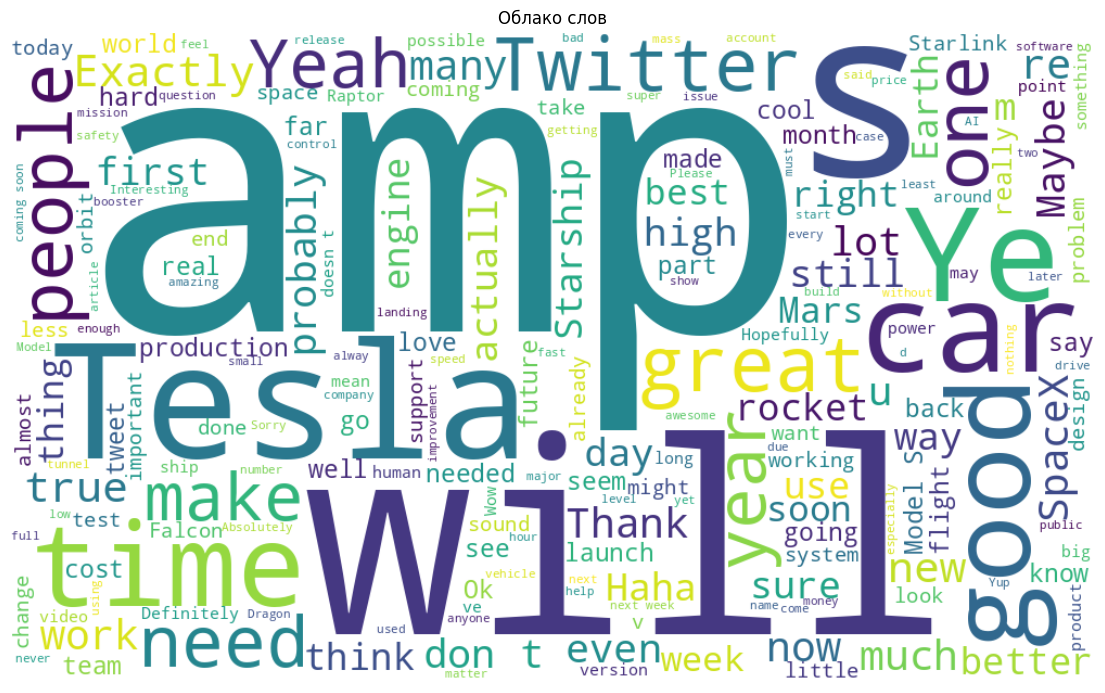

In [14]:
from wordcloud import WordCloud

#объединяем весь текст в одну строку
combined_text = ' '.join(df['clean_text'])

# создаем облако слов
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(combined_text)

# визуализируем его
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов')
plt.show()


Как следовало ожидать, большинство слов - это слова, из которых состоит большая часть повседневной речи. Тем не менее, тут виден почерк Илона: amp, Tesla, Model, S, car, Starship, Mars ...

Посмотрим еще на словосочетания

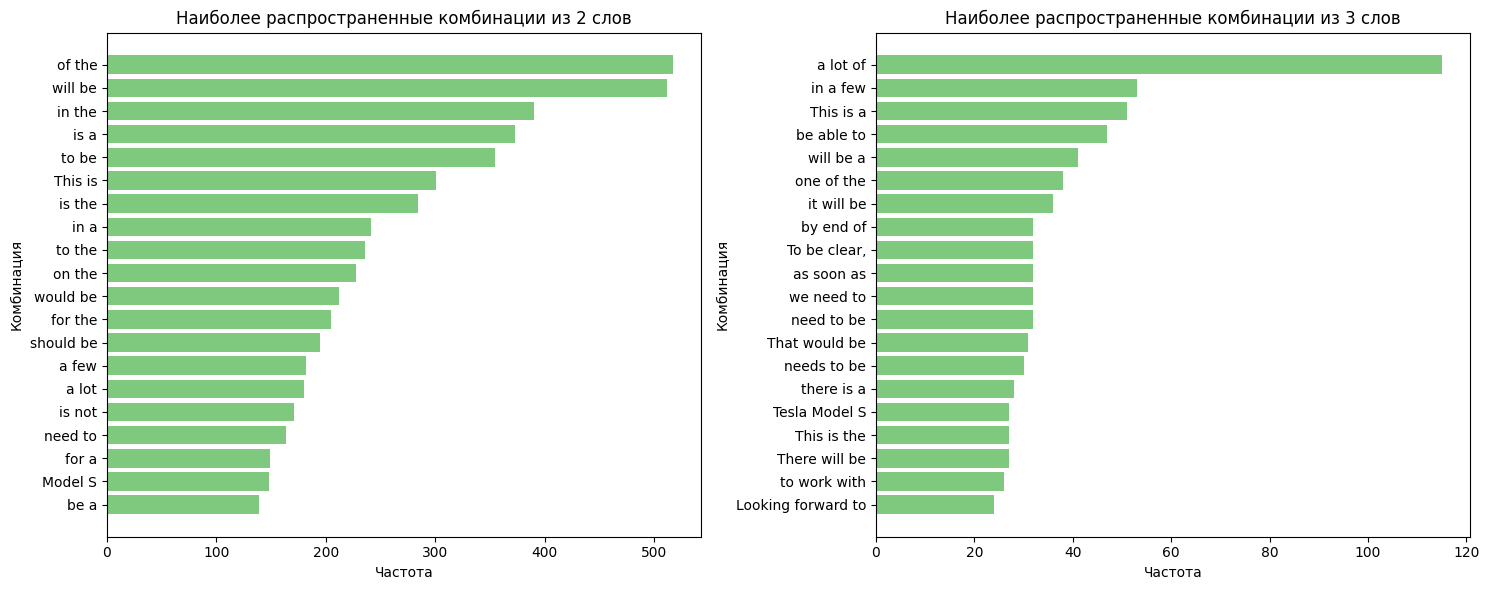

In [15]:
import nltk
from nltk.util import ngrams
from collections import Counter

# разбиваем текст на слова
words = combined_text.split()

# создаем всевозможные комбинации из 2 и 3 слов
word_combinations_2 = list(ngrams(words, 2))
word_combinations_3 = list(ngrams(words, 3))

#подсчитываем, сколько раз каждая комбинация использовалась
word_combinations_2_counts = Counter(word_combinations_2)
word_combinations_3_counts = Counter(word_combinations_3)

# выбираем топ-20 из каждого списка
top_combinations_2 = word_combinations_2_counts.most_common(20)
top_combinations_3 = word_combinations_3_counts.most_common(20)

combinations_2, counts_2 = zip(*sorted(top_combinations_2, key=lambda x: x[1], reverse=False))
combinations_3, counts_3 = zip(*sorted(top_combinations_3, key=lambda x: x[1], reverse=False))

# преобразуем комбинации в строки
combinations_2 = [' '.join(comb) for comb in combinations_2]
combinations_3 = [' '.join(comb) for comb in combinations_3]

# строим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# комбинации из 2 слов
ax1.barh(combinations_2, counts_2)
ax1.set_xlabel('Частота')
ax1.set_ylabel('Комбинация')
ax1.set_title('Наиболее распространенные комбинации из 2 слов')

# комбинации из 3 слов
ax2.barh(combinations_3, counts_3)
ax2.set_xlabel('Частота')
ax2.set_ylabel('Комбинация')
ax2.set_title('Наиболее распространенные комбинации из 3 слов')

plt.tight_layout()
plt.show()


Из неповседневных словосочетаний можем заметить (Tesla) Model S. Посмотрим на то, с какими словами Илон использует ее.

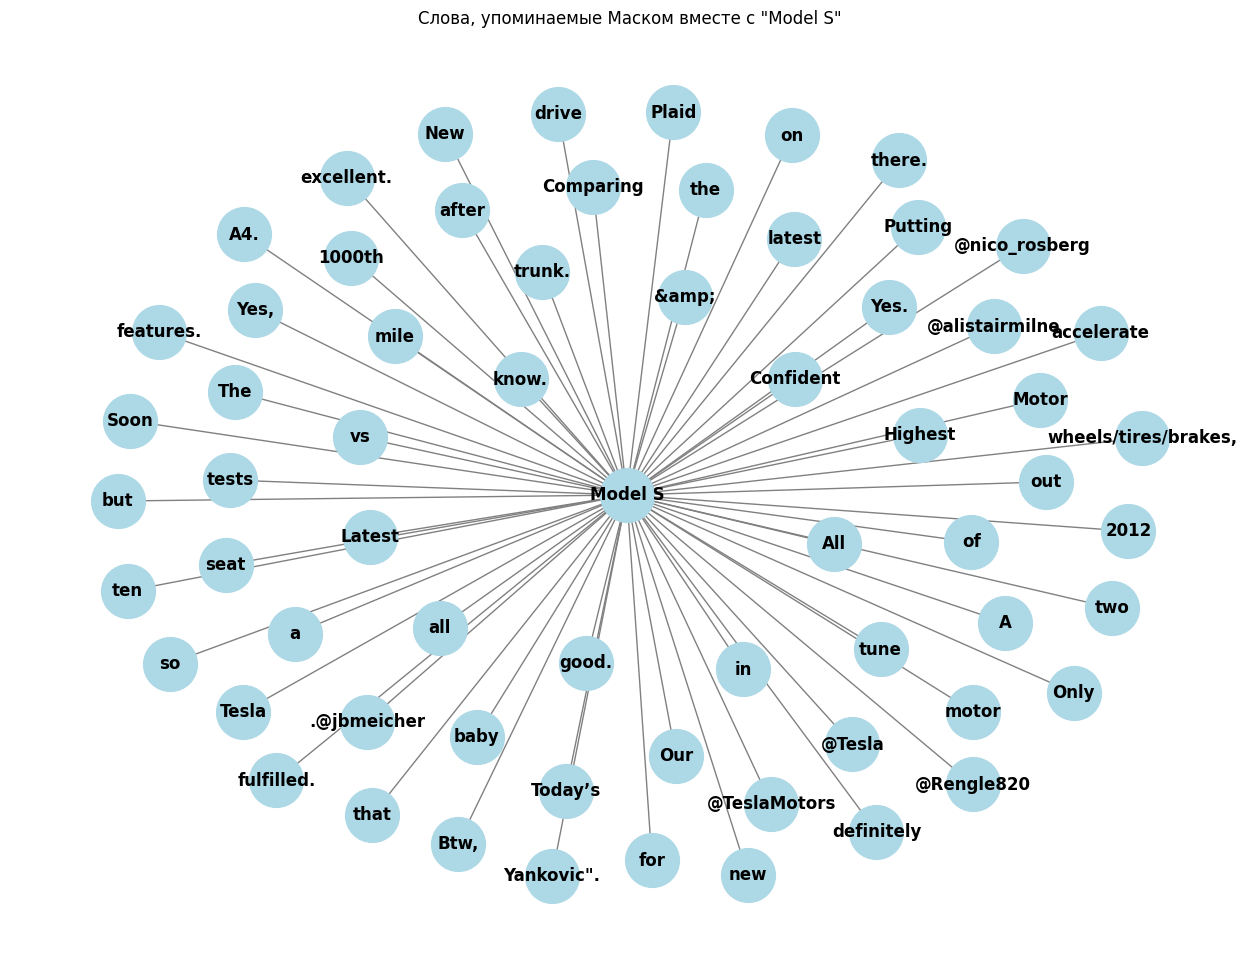

In [16]:
import networkx as nx

# фильтрация данных для упоминаний словосочетания 'Model S'
df_mS = df[df['clean_text'].str.contains('Model S')]

# создание графа
G = nx.Graph()

# обработка каждой записи в фильтрованном датафрейме
for h, row in df_mS.iterrows():
    text = row['text']
    words = text.split()
    for i in range(len(words) - 1):
        if words[i] == 'Model' and words[i+1] == 'S':
            word = words[i-1] if i > 0 else None
            if word is not None:
                G.add_edge('Model S', word)

# построение графа
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=1500, font_size=12, font_weight='bold', node_color='lightblue', edge_color='gray')
plt.title('Слова, упоминаемые Маском вместе с "Model S"')
plt.axis('off')
plt.show()

Highest, confident, excellent...

Посмотрим, про что еще пишет Илон. Например, какие страны он упоминает чаще всего.

<ipython-input-17-56df153da0a4>:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


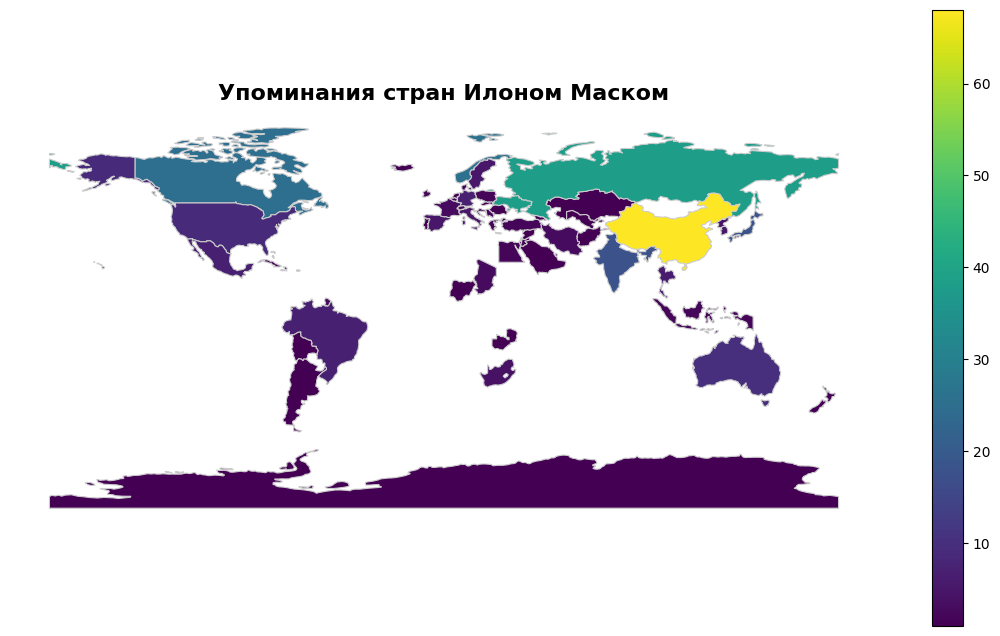

In [17]:
from geotext import GeoText
import geopandas as gpd

# извлекаем названия стран из твитов и заносим их в список
places = GeoText(combined_text)
countries_mentioned = places.countries
countries_mentioned = [i.replace('United States', 'United States of America') for i in countries_mentioned] # геопанадс называет штаты не как геотекст, поэтому делаем замену

# датафрейм с упоминаниями стран и их частотой
df_countries = pd.DataFrame({'Country': countries_mentioned})

# загружаем геоданных стран
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# группируем упоминания по странам и считаем частоты
mentions_count = df_countries['Country'].value_counts().reset_index()
mentions_count.columns = ['Country', 'Mentions']

# объединяем геоданные и частоту упоминания стран
world = world.merge(mentions_count, left_on='name', right_on='Country')

# строим карту
fig, ax = plt.subplots(figsize=(14, 8))
world.plot(column='Mentions', ax=ax, linewidth=0.8, edgecolor='0.8', legend=True)
ax.set_title('Упоминания стран Илоном Маском', fontdict={'fontsize': '16', 'fontweight' : 'bold'})
plt.axis('off')
plt.show()


Явные лидеры Китай, Россия и Украина. В свете последних событий неудивительно.

### Анализ тональности твитов

Попробуем определить тональность текста.

In [18]:
from textblob import TextBlob

# функция перевода оценки polarity в категориальную переменную
def sentimentality(score):
  if score > 0:
    return 'positive'
  elif score < 0:
    return 'negative'
  else:
    return 'neutral'

# используя методы библиотеки, рассчитыаем показатели
df['subjectivity'] = df['clean_text'].apply(lambda text: TextBlob(text).sentiment.subjectivity)
df['polarity'] = df['clean_text'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['sentimentality'] = df['polarity'].apply(sentimentality)


In [19]:
# посмотрим доли твитов разных тональностей
df['sentimentality'].value_counts()/len(df)

positive    0.439765
neutral     0.436918
negative    0.123317
Name: sentimentality, dtype: float64

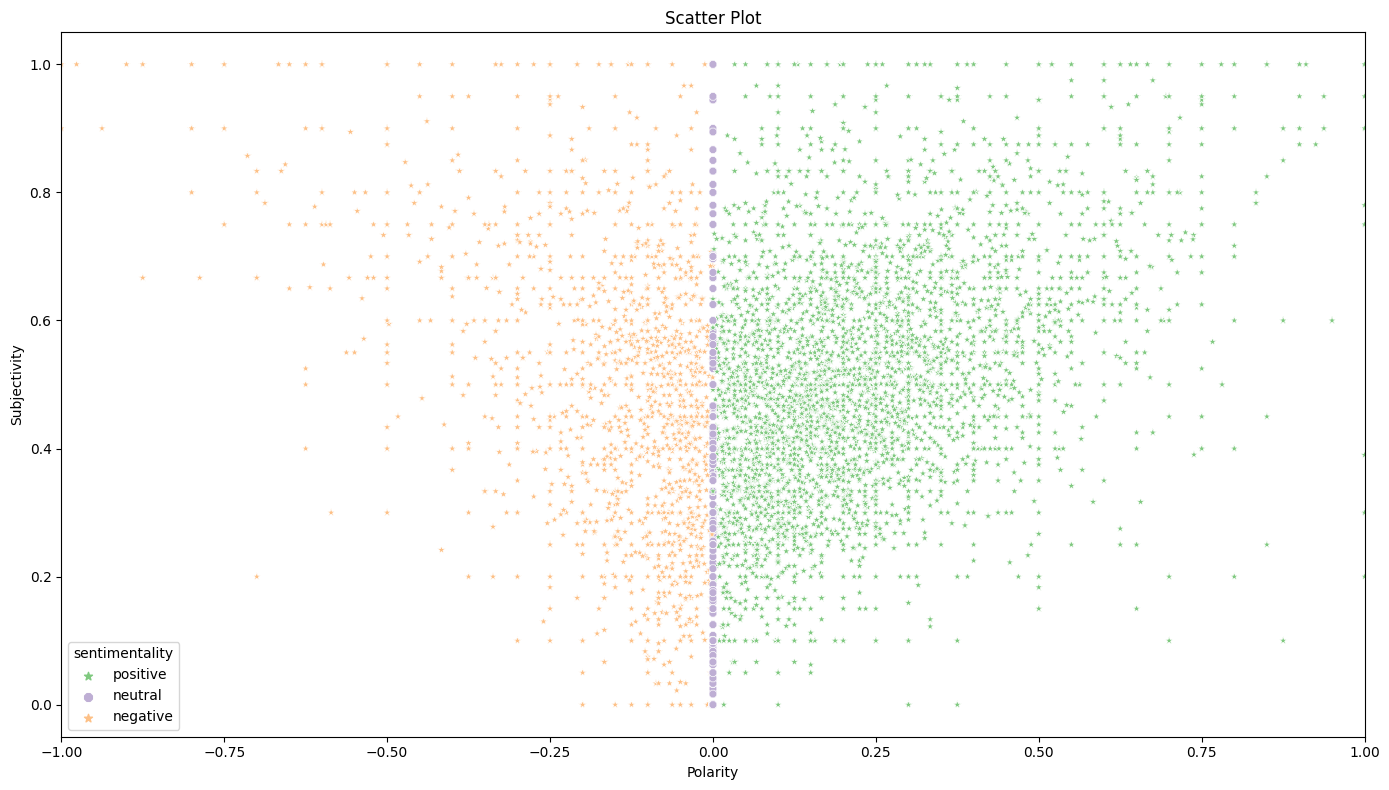

In [20]:
# посмотрим на графике
plt.figure(figsize=(14, 8))

markers = {
    'positive': '*',
    'neutral': '8',
    'negative': '*'
}

sns.scatterplot(data=df, x='polarity', y='subjectivity', hue='sentimentality', style='sentimentality', markers=markers).set(xlim=(-1, 1))

plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()
plt.show()


Большинство твитов, как и следовало ожидать, имеют оценку полярности в районе нуля, но есть и те, которые близки к крайним значениям. Попробуем сгруппировать твиты по настроению и посмотреть различные распределенния. Начнем со средней длины (в символах).

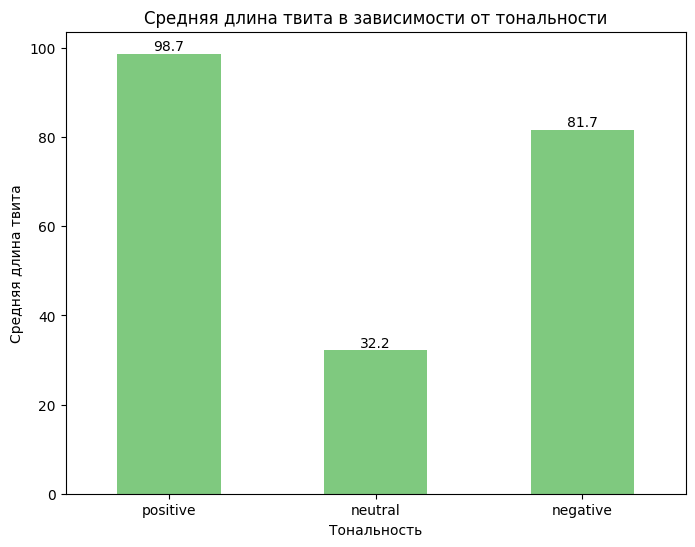

In [21]:
# группировка по тональности и вычисление средней длины твита
df['tweet_length'] = df['clean_text'].apply(lambda x: len(x))
grouped_sentiment = df.groupby('sentimentality')['tweet_length'].apply(lambda x: np.mean(x))

# график
sentiments = ['positive', 'neutral', 'negative']
fig, ax = plt.subplots(figsize=(8, 6))
grouped_sentiment.plot(kind='bar', ax=ax)
ax.set_xticklabels(sentiments, rotation=0)
ax.set_xlabel('Тональность')
ax.set_ylabel('Средняя длина твита')
ax.set_title('Средняя длина твита в зависимости от тональности')

# подписи кол-ва
for i, length in enumerate(grouped_sentiment):
    plt.text(i, length, f'{length:.1f}', ha='center', va='bottom')

plt.show()

Видим, что в среднем позитивные и негативные твиты содержат больше символов, чем нейтральные. Мне кажется, это связано с тем, что тональность короткого предложения сложнее определить.

Также в среднем негативные твиты короче позитивных. Видимо, чтобы написать рассказ, способный растрогать любого, много слов действительно не нужно.

Посмотрим, как тональность связана с временем, когда запосчен твит.

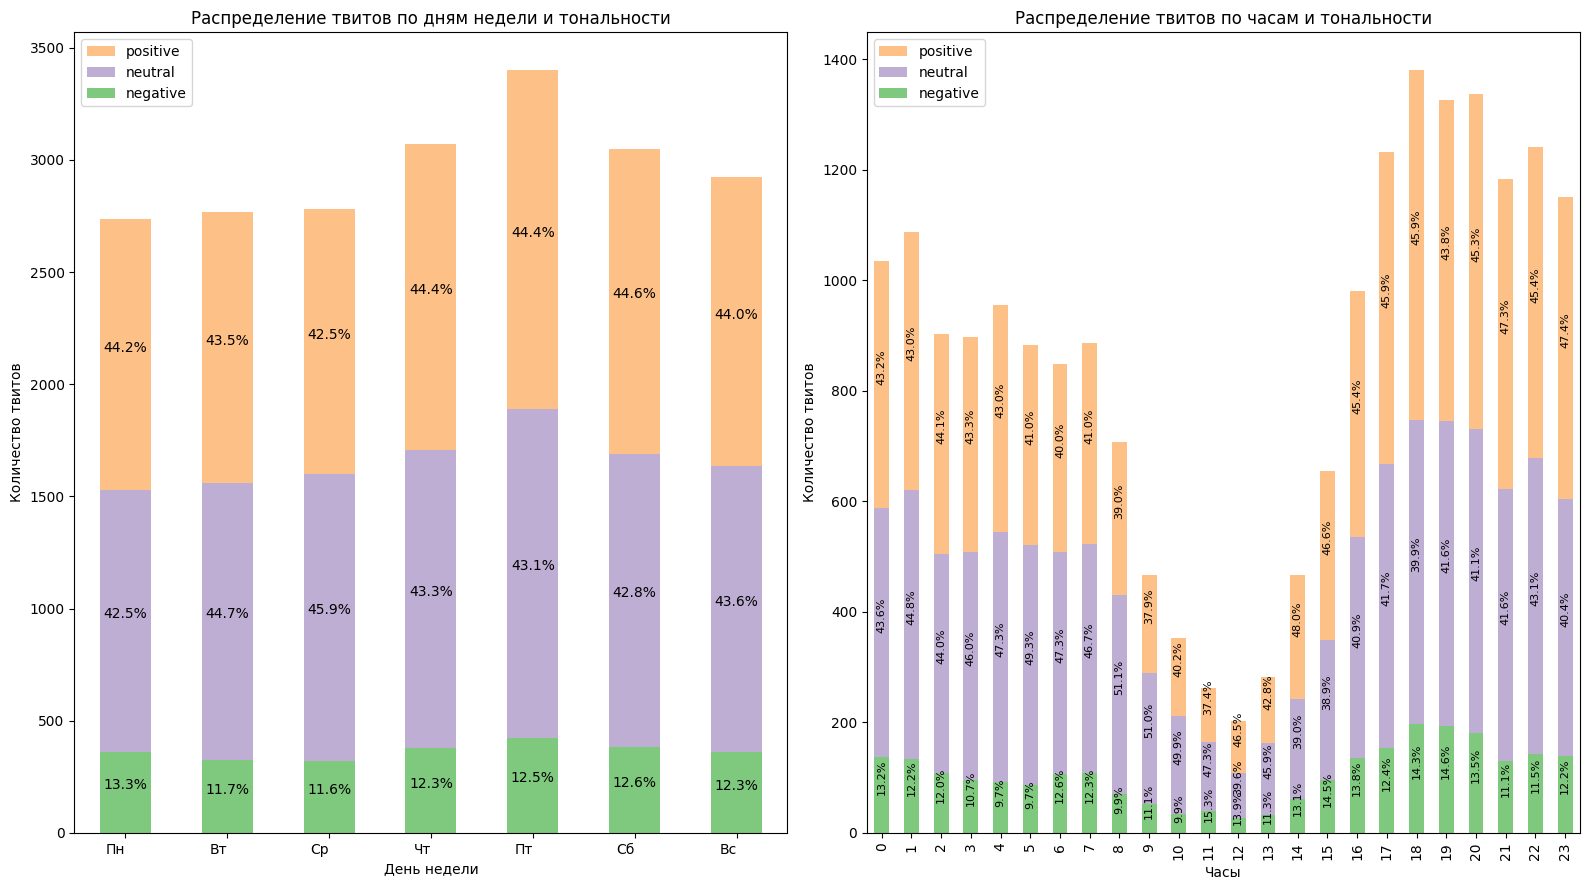

In [22]:
import matplotlib.pyplot as plt

# группировка по дням недели и тональности
grouped_weekday = df.groupby([df['date'].dt.weekday, 'sentimentality']).size().unstack()
days_of_week = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

# группировка по часам и тональности
grouped_hour = df.groupby([df['date'].dt.hour, 'sentimentality']).size().unstack()
hours_of_day = range(24)

# графики
sentiments = ['positive', 'neutral', 'negative']
fig, ax = plt.subplots(1, 2, figsize=(16, 9))

# график по дням недели
grouped_weekday.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_xticks(range(len(days_of_week)))
ax[0].set_xticklabels(days_of_week, rotation=0, ha='right')
ax[0].set_xlabel('День недели')
ax[0].set_ylabel('Количество твитов')
ax[0].set_title('Распределение твитов по дням недели и тональности')

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[::-1], labels[::-1], loc='upper left')

# подписи с долями
total_tweets_weekday = grouped_weekday.sum(axis=1)
for i, (day, row) in enumerate(grouped_weekday.iterrows()):
    y_offset = 0
    for j, sentiment in enumerate(sentiments[::-1]):
        count = row[sentiment]
        percentage = count / total_tweets_weekday[i] * 100
        ax[0].text(i, y_offset + count / 2, f'{percentage:.1f}%', ha='center', va='bottom')
        y_offset += count

# график по часам
grouped_hour.plot(kind='bar', stacked=True, ax=ax[1])

ax[1].set_xticks(hours_of_day)
ax[1].set_xlabel('Часы')
ax[1].set_ylabel('Количество твитов')
ax[1].set_title('Распределение твитов по часам и тональности')

handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[::-1], labels[::-1], loc='upper left')

# подписи с долями
total_tweets_hour = grouped_hour.sum(axis=1)
for i, (hour, row) in enumerate(grouped_hour.iterrows()):
    y_offset = 0
    for j, sentiment in enumerate(sentiments[::-1]):
        count = row[sentiment]
        percentage = count / total_tweets_hour[i] * 100
        ax[1].text(i, y_offset + count / 2, f'{percentage:.1f}%', ha='center', va='bottom', rotation=90, fontsize = 8)
        y_offset += count

plt.tight_layout()
plt.show()


По графикам видно, что пропорция твитов разных тональностей сохраняется вне зависимости от дня недели или часа и примерно равна доле данной тональности среди всех твитов.

Напомню, что среди всех твитов нейтральных и позитивных - по 44%, негативных - 12%

Посмотрим, сколько твиты разных тональностей вносят в общее количество ретвитов, лайков, цитирований и просмотров.

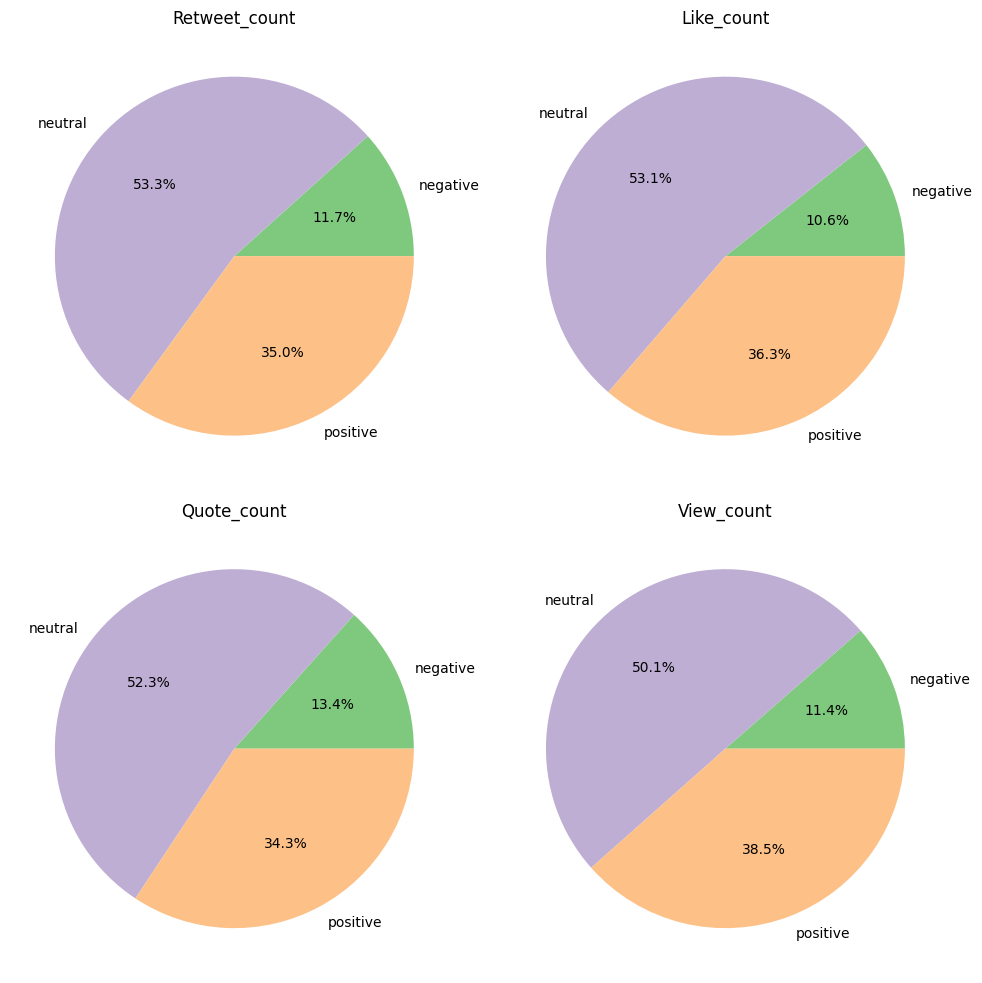

In [23]:
# группируем и агрегируем по тональности
grouped_sentiment = df.groupby('sentimentality')[['retweet_count', 'like_count', 'quote_count', 'view_count']].sum()

# графики
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()

# построим пайчарты
for i, col in enumerate(columns):
    ax = axes[i]
    ax.pie(grouped_sentiment[col], labels=grouped_sentiment.index, autopct='%1.1f%%')
    ax.set_title(col.capitalize())

plt.tight_layout()
plt.show()


Опять выглядит так, что каждая группа вносит вклад в общее количество пропорционально своей доле.

Посмотрим, на средние количества ретвитов, лайков, цитирований и просмотров.

<ipython-input-24-b6a678c9a7bb>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('sentimentality').mean()[['retweet_count', 'like_count', 'quote_count', 'view_count']]


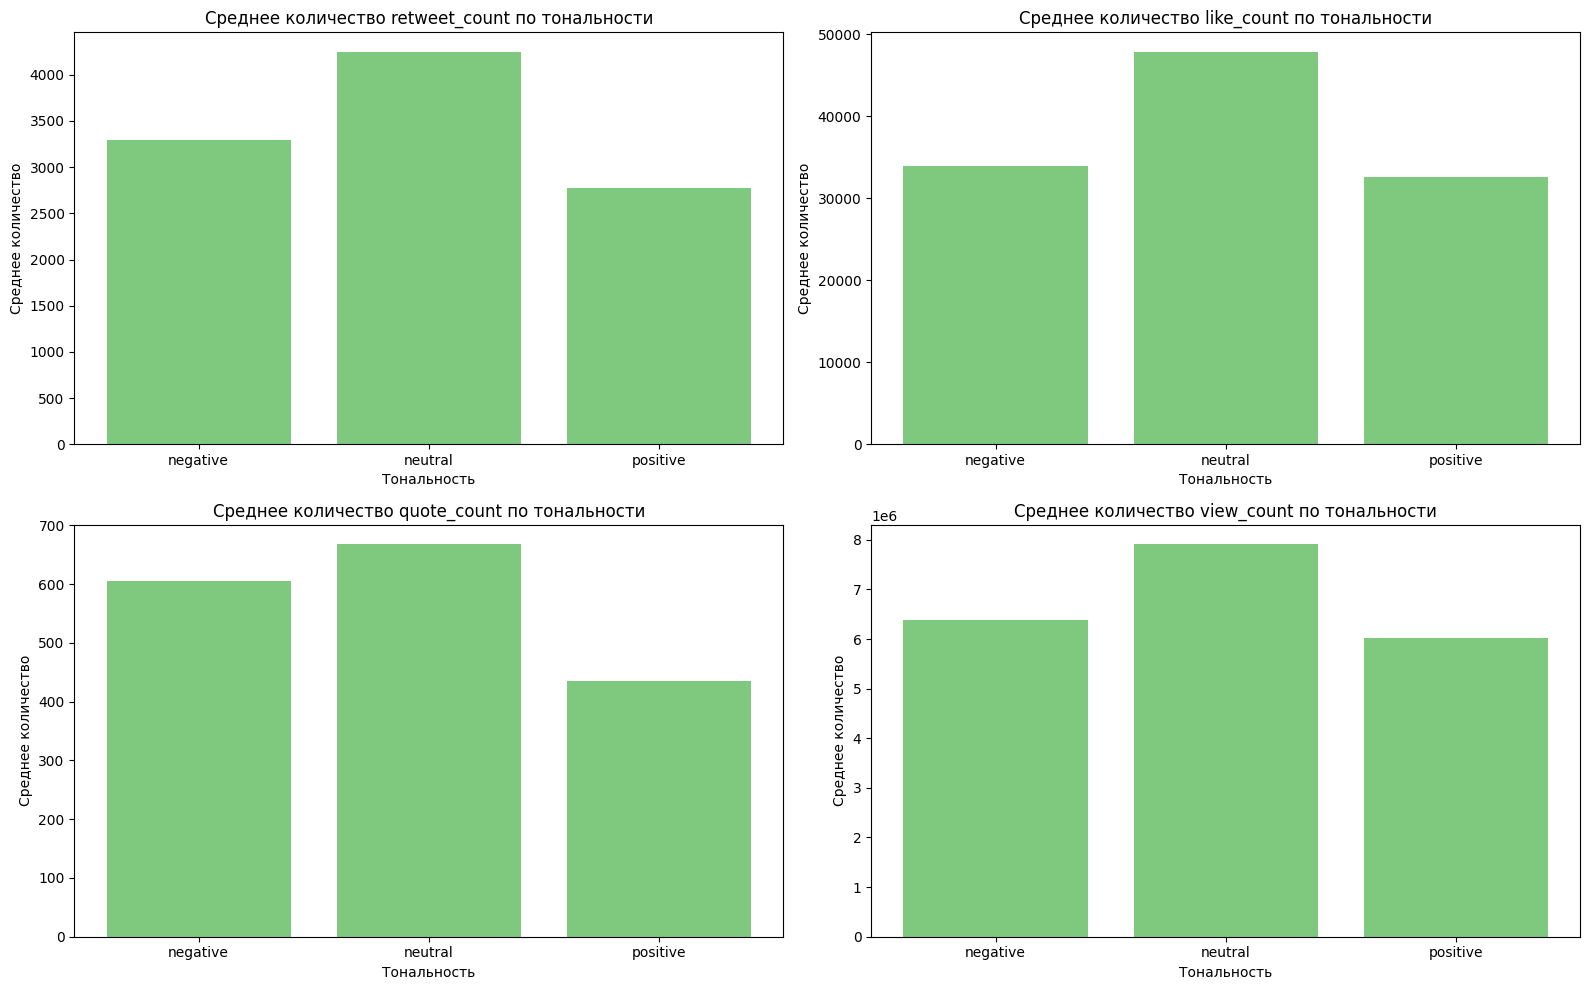

In [24]:
import matplotlib.pyplot as plt

# группируем
grouped = df.groupby('sentimentality').mean()[['retweet_count', 'like_count', 'quote_count', 'view_count']]

# графики
sentiments = ['negative', 'neutral', 'positive']
metrics = ['retweet_count', 'like_count', 'quote_count', 'view_count']

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax.bar(sentiments, grouped[metric])
    ax.set_xlabel('Тональность')
    ax.set_ylabel('Среднее количество')
    ax.set_title(f'Среднее количество {metric} по тональности')

plt.tight_layout()
plt.show()


Кажется, тут уже есть разница между группами. Проверим это с помощью статистического теста.

In [27]:
import scipy.stats as stats

# группировка
grouped_sentiment = df.groupby('sentimentality')

# проведение попарных сравнений средних значений групп с помощью t-теста, сохранение результатов
results = []
for col in ['retweet_count', 'like_count', 'quote_count', 'view_count']:
    p_values = []

    for i, group1_name in enumerate(grouped_sentiment.groups.keys()):
        for j in range(i + 1, len(grouped_sentiment)):
            group2_name = list(grouped_sentiment.groups.keys())[j]
            group1 = grouped_sentiment.get_group(group1_name)[col]
            group2 = grouped_sentiment.get_group(group2_name)[col]
            
            t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
            p_values.append((group1_name, group2_name, p_value))

    for i, (group1_name, group2_name, p_value) in enumerate(p_values):
        results.append((col, group1_name, group2_name, p_value, p_value < 0.05))

# датафрейм результатов
columns = ['Something_count', 'Group 1', 'Group 2', 'P-value', 'p-value < 0.05']
df_results = pd.DataFrame(results, columns=columns)

df_results


,Something_count,Group 1,Group 2,P-value,p-value < 0.05
0,retweet_count,negative,neutral,2.696435e-03,True
1,retweet_count,negative,positive,8.161322e-02,False
2,retweet_count,neutral,positive,5.447922e-14,True
3,like_count,negative,neutral,5.026535e-08,True
4,like_count,negative,positive,5.517779e-01,False
5,like_count,neutral,positive,4.696658e-18,True
6,quote_count,negative,neutral,5.123634e-01,False
7,quote_count,negative,positive,5.672637e-02,False
8,quote_count,neutral,positive,2.204826e-07,True
9,view_count,negative,neutral,3.199403e-05,True


In [28]:
df_results[df_results['p-value < 0.05'] == True]

,Something_count,Group 1,Group 2,P-value,p-value < 0.05
0,retweet_count,negative,neutral,2.696435e-03,True
2,retweet_count,neutral,positive,5.447922e-14,True
3,like_count,negative,neutral,5.026535e-08,True
5,like_count,neutral,positive,4.696658e-18,True
8,quote_count,neutral,positive,2.204826e-07,True
9,view_count,negative,neutral,3.199403e-05,True
11,view_count,neutral,positive,5.499937e-16,True


Видим, что в некоторых случаях значения p-value ниже уровня значимости (0.05). В этих случаях, результаты тестов указывают на значимую разницу средних значений между группами в зависимости от тональности.

Таким образом, в отношении данных случаях, мы можем заключить, что тональность влияет на количество ретвитов, лайков, цитат и просмотров, и есть статистически значимые различия между группами в зависимости от тональности.

# Генерация текстов на основе твитов Илона Маска

И напоследок, раз уж я работаю с текстами, хотелось бы попробовать построить цепи Маркова на основе твитов Илона Маска.

In [29]:
#объединяем весь текст в одну строку
combined_text = ' '.join(df['clean_text'])

def build_markov_chain(text, order): # text - это text, order - это количество предыдущих слов, влияющих на следующее
    words = text.split()
    chain = {}
    for i in range(len(words)-order):
        prefix = tuple(words[i:i+order])  # создаем префикс из order предыдущих слов
        suffix = words[i+order]  # получаем следующее слово - постфикс
        if prefix in chain:
            chain[prefix].append(suffix)  # добавляем постфикс к префиксу в цепи Маркова
        else:
            chain[prefix] = [suffix]  # создаем новую запись в цепи Маркова
    return chain

def generate_text(chain, seed, length):
    current_prefix = tuple(seed.split())  # начальный префикс для генерации текста
    generated_text = list(current_prefix)  # инициализируем список сгенерированного текста
    while len(generated_text) < length:
        if current_prefix in chain:
            next_word = np.random.choice(chain[current_prefix])  # выбираем случайный постфикс из доступных в цепи
            generated_text.append(next_word)  # добавляем следующее слово к сгенерированному тексту
            current_prefix = tuple(generated_text[-order:])  # обновляем текущий префикс для следующей итерации
        else:
            break  # если префикс отсутствует в цепи, завершаем генерацию текста
    return ' '.join(generated_text)

order = 3  # количество предыдущих слов, влияющих на следующее
seed = 'Looking forward to'  # начальная фраза для генерации текста
length = 25  # количество слов в генерируемом тексте
chain = build_markov_chain(combined_text.lower(), order) 

begginings = ['Looking forward to', 'Tesla Model S', 'Thank you for', 'Would be great']

for phrase in begginings:
    seed = f"{phrase.capitalize()} "
    for _ in range(2):
        generated_text = generate_text(chain, seed.lower(), length)
        print(generated_text)

looking forward to working together. no, we’re building a bfr dev ship to do supersonic through landing tests in boca chica, texas engines currently on
looking forward to exciting plans in france! here we go!! we’re double-checking some facts, so probably start live tweeting in about 40 mins oh you
tesla model s to date has the best safety record of any car in the world &amp; our factory injury rate is better than professionals
tesla model s plaid delivery pushed to june 10. needs one more week of tweak. this car feels like a show &amp; tell weekend. i
thank you for the lovely letter. that sounds like a good design by yeah, worked on my mom’s cousin’s farm in saskatchewan at age 17.
thank you for helping those in need to be sherlock holmes. it won't even need to ask you most of the time want to clarify
would be great next i’m buying coca-cola to put the cocaine back in, despite the extreme popularity of such a move no, this is a
would be great glad it’s working! the sheer amount of wor

Получается далеко неидеально, но иногда попадаются прикольные фразочки.

# Заключение

Проект включал анализ активности и содержания твитов Илона Маска, в том числе использование обработки естественного языка для анализа содержания и изучение метрик, таких как ретвиты, лайки, цитирования и просмотры. Полученные результаты позволяют лучше понять активность и интересы Илона Маска. В дальнейшем можно расширить исследование, фокусируясь на популярных темах и тегах, которые часто упоминаются в его твитах.